In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mortality-rate-heart-patient-pakistan-hospital/FIC.Full CSV.csv


# Introduction #

**A heart attack (myocardial infarction) happens when one or more areas of the heart muscle don't get enough oxygen. This happens when blood flow to the heart muscle is blocked**


## Installing and importing required libraries for EDA

In [2]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.4/185.4 kB 371.5 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=598becaaf9e6908d4c7e52ac444d2ecfaa782d05204c75d4f9019635c69901be
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=a5891cf855b094a031e2f9af2d6f683f56b28203440a17d7bd950eff358c9025
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils


In [3]:
import missingno as msno
import plotly.express as px
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from scipy import stats
import pingouin as pg
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/kaggle/input/mortality-rate-heart-patient-pakistan-hospital/FIC.Full CSV.csv")

In [5]:
#removing white spaces 
df.columns = df.columns.str.replace(" ","")
    

In [6]:
df.head(5)

,Age,Age.Group,Gender,Locality,Maritalstatus,Life.Style,Sleep,Category,Depression,Hyperlipi,Smoking,Family.History,F.History,Diabetes,HTN,Allergies,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,S.Chloride,C.P.K,CK.MB,ESR,WBC,RBC,Hemoglobin,P.C.V,M.C.V,M.C.H,M.C.H.C,PLATELET_COUNT,NEUTROPHIL,LYMPHO,MONOCYTE,EOSINO,Others,CO,Diagnosis,Hypersensitivity,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,NO,NO,0,1,NO,NO,100.6,0,84,28.0,0.9,138,3.3,107,130,30,11,9900,4.26,11.6,0.34,79.7,27.2,0.34,265000,0.70,0.25,0.03,2,no,"Chest pain,",EXT. ACUTE WALL M.I,NO,4,132,341,1,2,136,1,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,NO,NO,0,0,NO,NO,90.6,0,135,17.0,0.7,144,4.7,104,163,30,27,15800,5.74,14.5,0.44,78.0,25.0,0.32,287000,0.73,0.20,0.04,3,no,"Central Chest pain,",A/W M.I,NO,4,130,305,0,0,142,1,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,NO,0,1,YES,NO,100.7,0,146,37.0,1.0,137,4.2,103,149,22,19,7900,4.83,14.1,0.42,87.0,29.0,0.33,183000,0.60,0.33,0.04,3,LV dysfunction,"Chest pain,SOB, Cold sweating",AC I/W M.I (RV) RE. M.I,NO,4,180,327,0,1,117,1,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,NO,NO,0,1,YES,NO,160.1,0,146,37.0,1.0,137,4.2,103,149,22,19,7900,4.83,14.1,0.42,87.0,29.0,0.33,183000,0.60,0.33,0.04,3,HTN,"CENTRAL Chest pain,",I/W M.I,NO,4,128,205,0,1,130,1,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,NO,NO,0,1,YES,NO,90.6,0,85,78.0,1.2,139,4.5,112,75,18,13,6900,4.41,12.3,0.36,82.0,27.0,0.33,211000,0.71,0.25,0.02,2,no,"Chest pain,",A/W M.I,NO,4,200,288,1,2,133,1,4.0,3,2,7,3,1,NO,0,0,34


In [7]:
#Reclassifying all objects into categorical data 
for i in df.columns:
    if df[i].dtype == "O":
        df[i] = pd.Categorical(df[i])
    else:
        continue

In [8]:
#Recoding categorcial variables
df["F.History"].replace(to_replace=[0,1],value=["YES","NO"], inplace= True)
df["Diabetes"].replace(to_replace=[0,1],value=["YES","NO"], inplace= True)
df["Thrombolysis"].replace(to_replace=[0,1],value=["YES","NO"], inplace= True)
df.cp=pd.Categorical(df.cp,categories=[1,2,3,4],ordered=True)
df.cp = df.cp.map({1:"Grade_1",2:"Grade_2",3:"Grade_3",4:"Grade_4"})
df["fbs"].replace(to_replace=[0,1],value=["<=120mg/dl",">120mg/dl"], inplace= True)
df["restecg"].replace(to_replace=[0,1,2],value=["normal","ST_T_abnormal","LVH"], inplace= True)
df["Mortality"].replace(to_replace=[0,1],value=["Died","Alive"], inplace= True)
df.Mortality=pd.Categorical(df.Mortality,categories=("Alive","Died"))
df["Age.Group"] = pd.Categorical(df["Age.Group"],categories=('21-30', '31-40', '41-50', '51-60', '61-70'),ordered=True)


In [9]:
df.shape

(368, 60)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               368 non-null    int64   
 1   Age.Group         368 non-null    category
 2   Gender            368 non-null    category
 3   Locality          368 non-null    category
 4   Maritalstatus     368 non-null    category
 5   Life.Style        368 non-null    category
 6   Sleep             368 non-null    category
 7   Category          368 non-null    category
 8   Depression        368 non-null    category
 9   Hyperlipi         368 non-null    category
 10  Smoking           368 non-null    category
 11  Family.History    368 non-null    category
 12  F.History         368 non-null    object  
 13  Diabetes          368 non-null    object  
 14  HTN               368 non-null    category
 15  Allergies         368 non-null    category
 16  BP                368 non-

# EXPLORATORY DATA ANALYSIS with DESCRIPTIVE AND INFERENTIAL STATISTICS

## Categorical variabels

<AxesSubplot:>

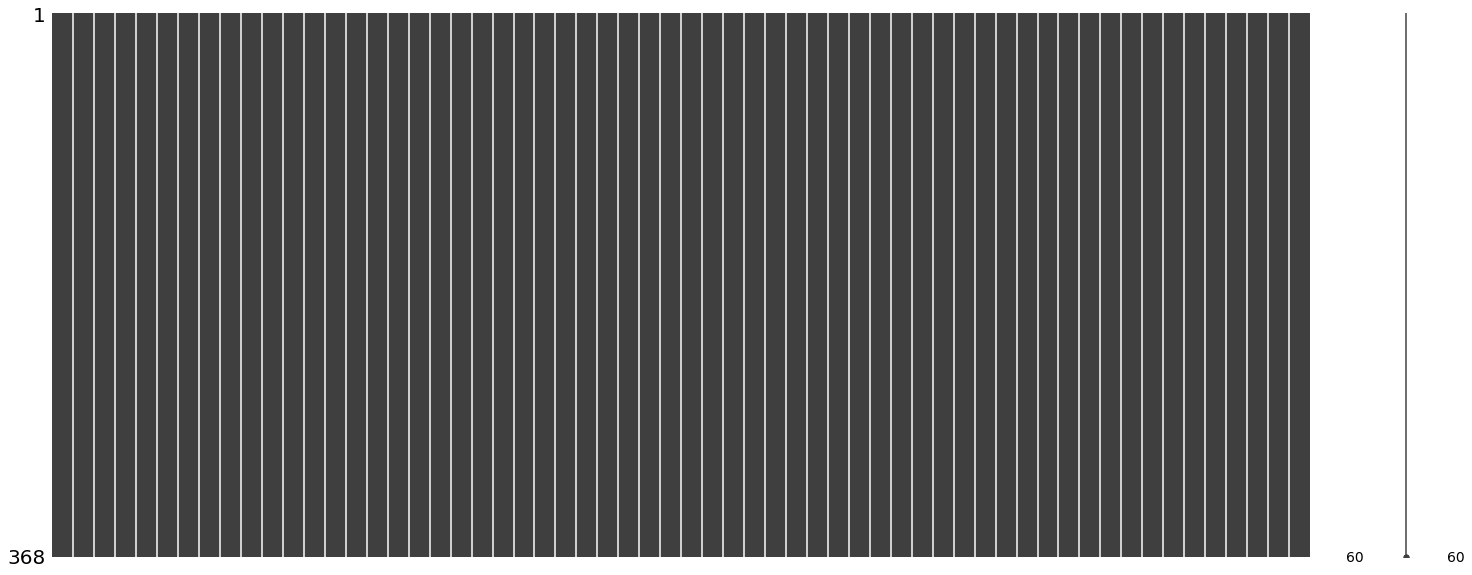

In [11]:
#Looking for missing values 
msno.matrix(df)

In [12]:
# Descriptives of continous variabels
df.describe().T.sort_values(by="mean", ascending=False).round(2)

,count,mean,std,min,25%,50%,75%,max
PLATELET_COUNT,368.0,248660.33,76707.56,20000.00,192000.00,237000.00,287000.00,459000.00
WBC,368.0,11181.28,3517.88,5800.00,7800.00,10650.00,13500.00,19590.00
C.P.K,368.0,553.89,957.61,52.00,135.00,188.00,390.00,4289.00
chol,368.0,248.94,50.13,131.00,212.00,249.00,283.00,409.00
BGR,368.0,219.99,139.34,60.00,117.00,164.00,291.00,563.00
thalach,368.0,140.92,22.99,71.00,125.00,144.00,158.00,195.00
S.Sodium,368.0,138.02,4.08,129.00,135.00,138.00,141.00,146.00
trestbps,368.0,132.74,18.19,100.00,120.00,130.00,142.00,200.00
BP,368.0,121.21,24.54,80.50,100.70,120.80,140.70,190.11
S.Chloride,368.0,103.82,4.80,90.00,100.00,104.00,107.00,112.00


In [13]:
# Age Group distribution
px.pie(df,values=df["Age.Group"].value_counts(),names=df["Age.Group"].unique(), title="AGE GROUP DISTRIBUTION")

In [14]:
# Sex distribution
px.pie(df, values = df.Gender.value_counts(), names = df.Gender.unique(), title = "SEX DISTRIBUTION")

## Visualization and inferential statistics of Categorical variables

In [15]:
#Identifying categorical variables 
categories = list()
for i in df.columns:
    if df[i].dtype == "category":
        categories.append(i)
    else:
        continue
print(categories)

['Age.Group', 'Gender', 'Locality', 'Maritalstatus', 'Life.Style', 'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking', 'Family.History', 'HTN', 'Allergies', 'Others', 'CO', 'Diagnosis', 'Hypersensitivity', 'cp', 'SK.React', 'Mortality']


In [16]:
# removing the target variable to facilitate in iteration
categories.remove('Mortality')


In [17]:
#list of all categorical variables
categories

['Age.Group',
 'Gender',
 'Locality',
 'Maritalstatus',
 'Life.Style',
 'Sleep',
 'Category',
 'Depression',
 'Hyperlipi',
 'Smoking',
 'Family.History',
 'HTN',
 'Allergies',
 'Others',
 'CO',
 'Diagnosis',
 'Hypersensitivity',
 'cp',
 'SK.React']

In [18]:
# Chi-squared test to determine significant associations among categorical data
from scipy.stats import chi2_contingency

## Hypothesis testing ##

**H0 = Null hypothesis (there is no statistically significant difference among the associations)**

**Ha = There is a statistically significant difference among the associations**

In [19]:
# Identifying only the categorical variables which are statistically significant 
significant_categories=list()
for category in categories:
    table = pd.crosstab(df[category],df.Mortality)
    stat, p, dof, expected =chi2_contingency(table)
    alpha = 0.50
    if p <= alpha:  
        print("Category: ",category)
        print("P-value: ", p.round(3))
        print("H0 rejected","\n")
        fig = px.histogram(df, x= category, color = 'Mortality', color_discrete_map= {"Alive":"aqua","Died":"deeppink"})
        fig.show()
    else:
        continue
    significant_categories.append(category)
print(significant_categories)

Category:  Age.Group
P-value:  0.0
H0 rejected 



Category:  Gender
P-value:  0.0
H0 rejected 



Category:  Locality
P-value:  0.028
H0 rejected 



Category:  Sleep
P-value:  0.277
H0 rejected 



Category:  Category
P-value:  0.022
H0 rejected 



Category:  Depression
P-value:  0.472
H0 rejected 



Category:  Smoking
P-value:  0.003
H0 rejected 



Category:  Family.History
P-value:  0.023
H0 rejected 



Category:  HTN
P-value:  0.001
H0 rejected 



Category:  Others
P-value:  0.0
H0 rejected 



Category:  CO
P-value:  0.0
H0 rejected 



Category:  Diagnosis
P-value:  0.0
H0 rejected 



Category:  cp
P-value:  0.03
H0 rejected 



Category:  SK.React
P-value:  0.0
H0 rejected 



['Age.Group', 'Gender', 'Locality', 'Sleep', 'Category', 'Depression', 'Smoking', 'Family.History', 'HTN', 'Others', 'CO', 'Diagnosis', 'cp', 'SK.React']


In [20]:
# final list of significant categorical variables
significant_categories

['Age.Group',
 'Gender',
 'Locality',
 'Sleep',
 'Category',
 'Depression',
 'Smoking',
 'Family.History',
 'HTN',
 'Others',
 'CO',
 'Diagnosis',
 'cp',
 'SK.React']

## Continous variables

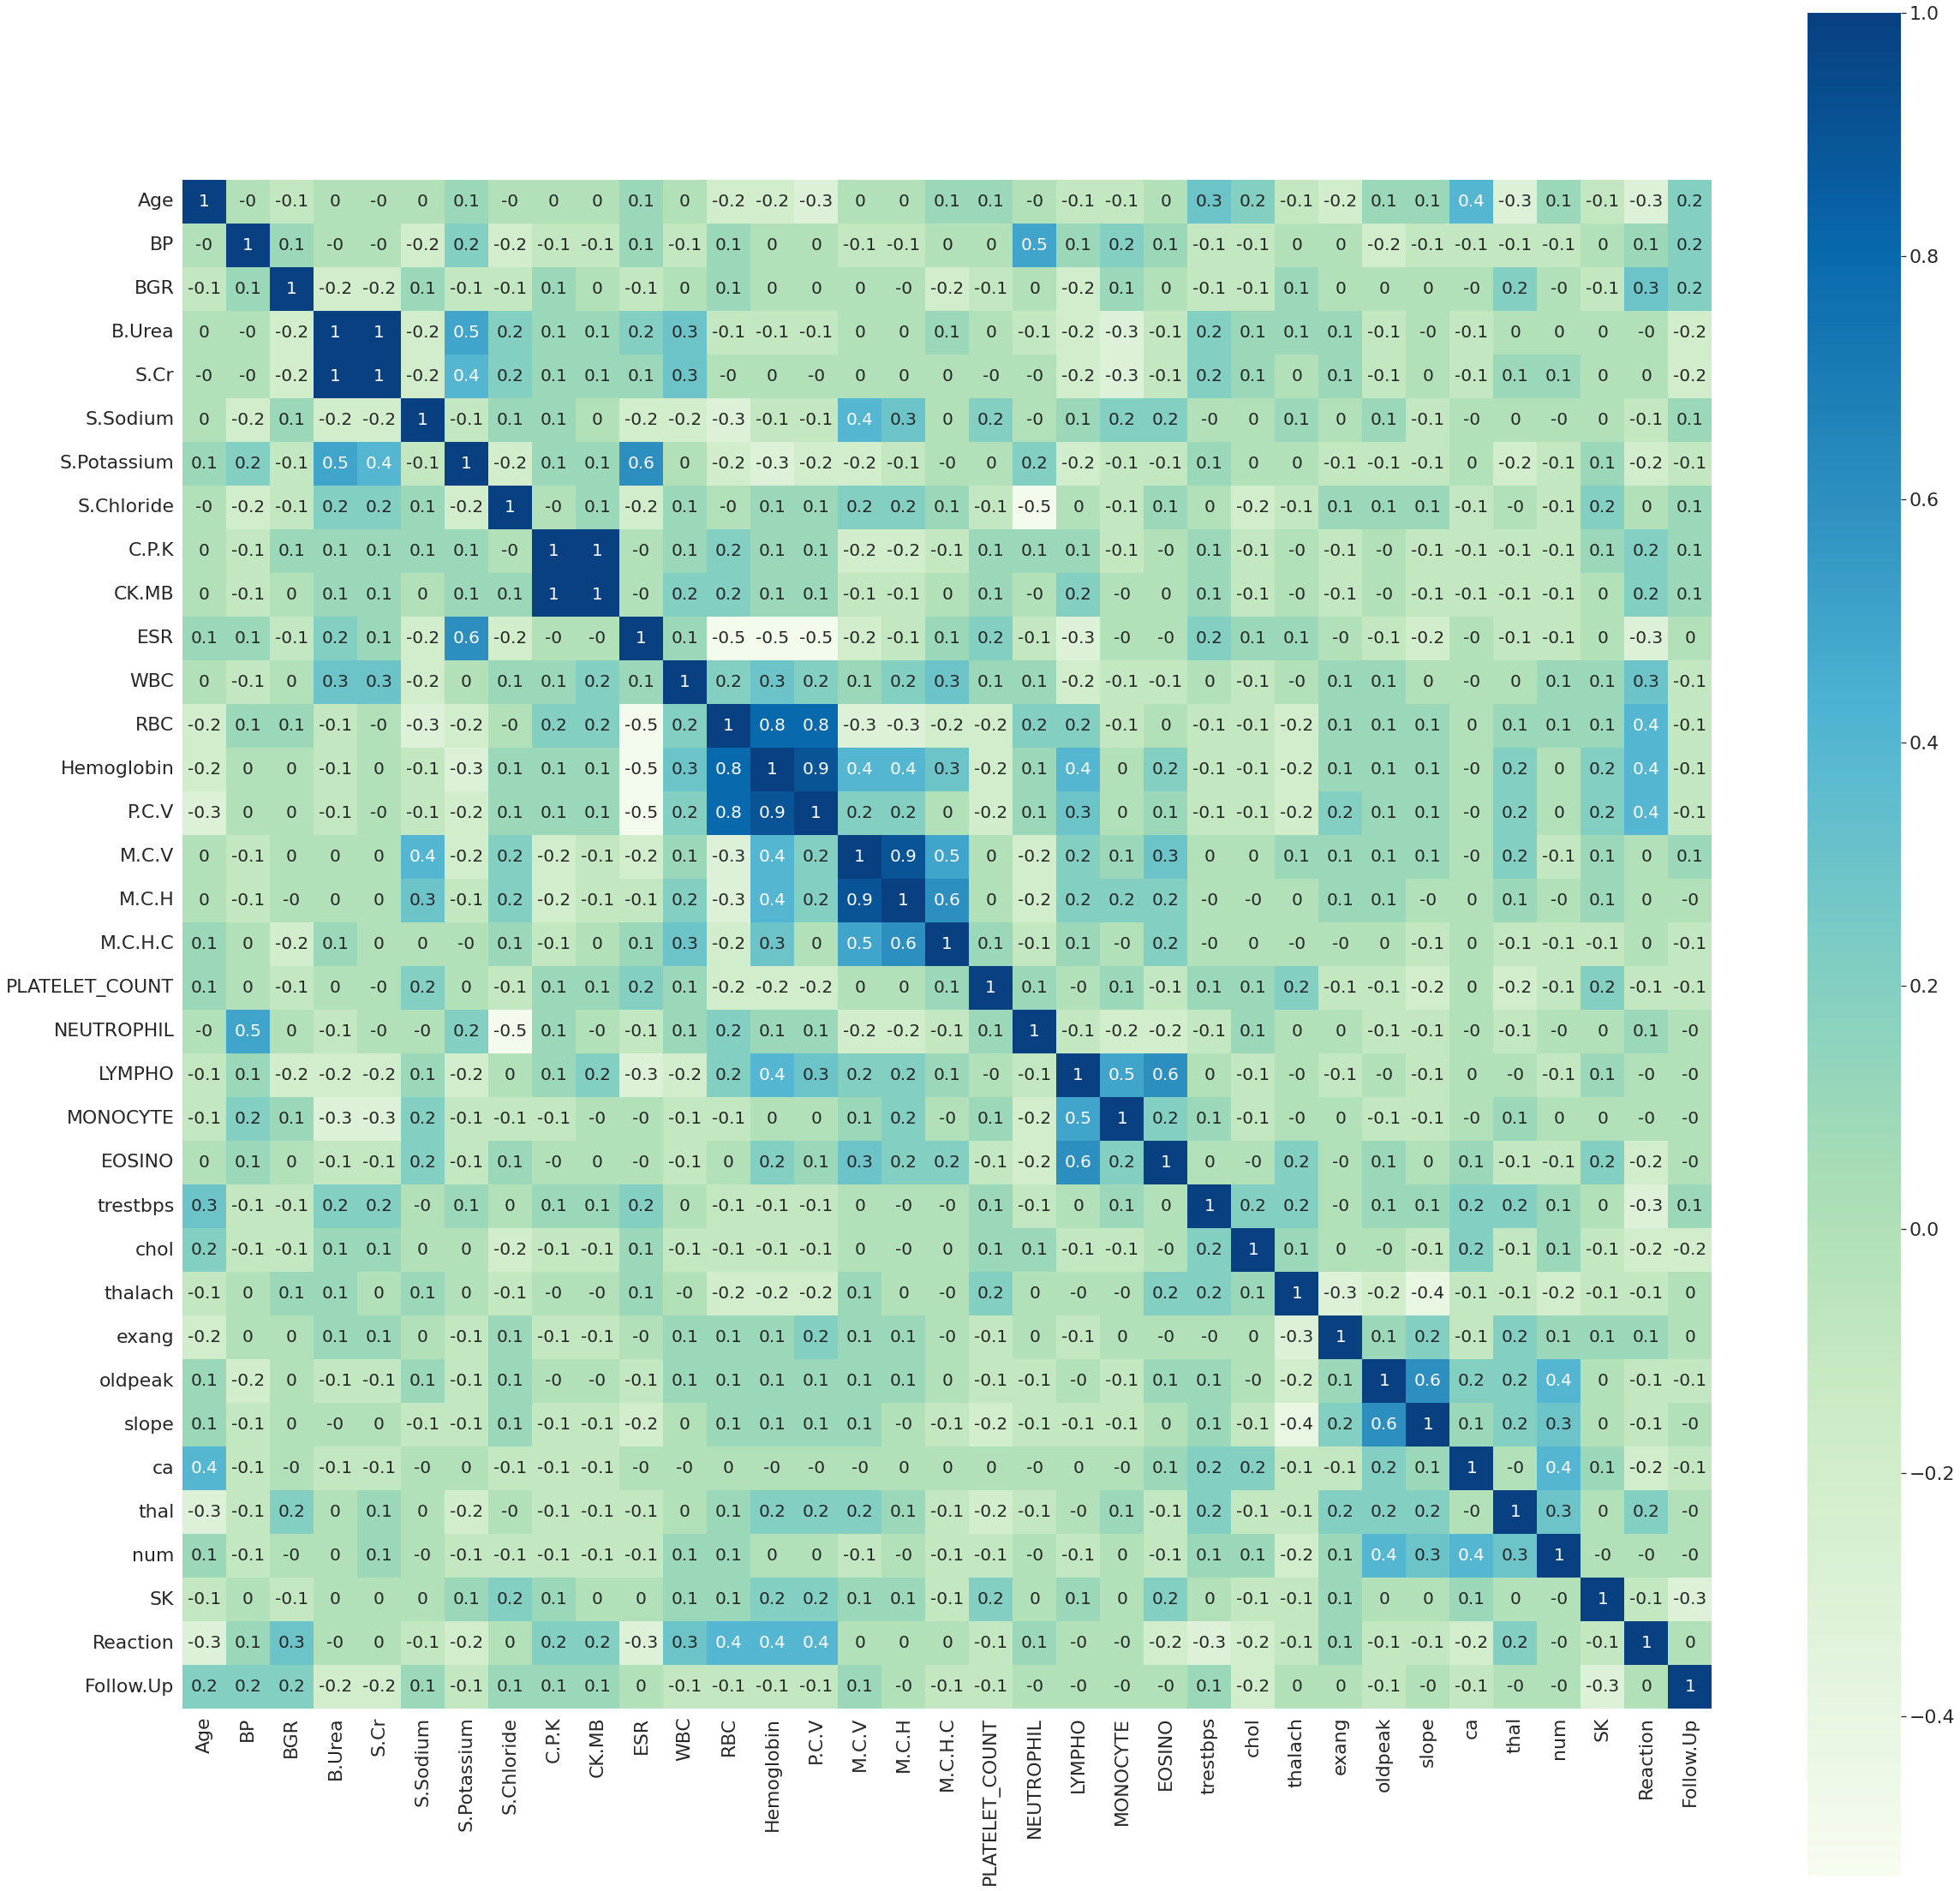

In [25]:
# Data correlation with heatmap
plt.figure(figsize=(40,40))
sns.heatmap(df.corr().round(1),vmin= df.corr().values.min(),vmax=1.0,cmap="GnBu",square = True,annot=True, annot_kws={"fontsize":20})
sns.set(font_scale=2)

In [26]:
#identifying all the numerical / continous variables
numerical=df.groupby(by=df.Mortality).mean().T.sort_values(by="Died",ascending=False).style.highlight_max(axis=1, color = "yellow")
numerical

Mortality,Alive,Died
PLATELET_COUNT,254550.000000,247024.305556
WBC,10212.500000,11450.381944
C.P.K,396.037500,597.736111
chol,265.575000,244.319444
BGR,190.137500,228.284722
thalach,139.200000,141.402778
S.Sodium,137.850000,138.065972
trestbps,129.337500,133.687500
BP,119.297500,121.745486
S.Chloride,103.925000,103.788194


In [27]:
# list of continous variables for iteration
continous = list(numerical.index)

In [28]:
continous

['PLATELET_COUNT',
 'WBC',
 'C.P.K',
 'chol',
 'BGR',
 'thalach',
 'S.Sodium',
 'trestbps',
 'BP',
 'S.Chloride',
 'M.C.V',
 'CK.MB',
 'Age',
 'B.Urea',
 'Follow.Up',
 'M.C.H',
 'ESR',
 'Hemoglobin',
 'thal',
 'RBC',
 'S.Potassium',
 'NEUTROPHIL',
 'EOSINO',
 'num',
 'slope',
 'oldpeak',
 'S.Cr',
 'ca',
 'SK',
 'Reaction',
 'exang',
 'P.C.V',
 'M.C.H.C',
 'LYMPHO',
 'MONOCYTE']

In [29]:
# EDA and inferential statistics of continous variables with identification of variables which are statistically significant 
significant_continous=list()
for feature in continous:
    x = df[feature][df.Mortality == "Alive"]
    y = df[feature][df.Mortality == "Died"]
    p = pg.ttest(x, y)
    P_value = p["p-val"][0].round(3)
    
    alpha = 0.5
    if P_value <= alpha:
            print(feature.upper(),"vs Mortality")
            print("P-value is :",P_value)
            p= px.violin(df,x=feature, y="Mortality",color="Mortality",color_discrete_map= {"Alive":"aqua","Died":"deeppink"})
            p.show()
            significant_continous.append(feature)
    else:
            continue

PLATELET_COUNT vs Mortality
P-value is : 0.412


WBC vs Mortality
P-value is : 0.004


C.P.K vs Mortality
P-value is : 0.032


CHOL vs Mortality
P-value is : 0.007


BGR vs Mortality
P-value is : 0.016


THALACH vs Mortality
P-value is : 0.402


TRESTBPS vs Mortality
P-value is : 0.031


BP vs Mortality
P-value is : 0.43


M.C.V vs Mortality
P-value is : 0.043


CK.MB vs Mortality
P-value is : 0.147


AGE vs Mortality
P-value is : 0.047


B.UREA vs Mortality
P-value is : 0.276


FOLLOW.UP vs Mortality
P-value is : 0.001


M.C.H vs Mortality
P-value is : 0.038


RBC vs Mortality
P-value is : 0.149


NEUTROPHIL vs Mortality
P-value is : 0.001


EOSINO vs Mortality
P-value is : 0.051


NUM vs Mortality
P-value is : 0.021


OLDPEAK vs Mortality
P-value is : 0.014


S.CR vs Mortality
P-value is : 0.208


CA vs Mortality
P-value is : 0.006


SK vs Mortality
P-value is : 0.014


REACTION vs Mortality
P-value is : 0.0


EXANG vs Mortality
P-value is : 0.045


M.C.H.C vs Mortality
P-value is : 0.104


LYMPHO vs Mortality
P-value is : 0.051


MONOCYTE vs Mortality
P-value is : 0.269


In [30]:

print(significant_continous)


['PLATELET_COUNT', 'WBC', 'C.P.K', 'chol', 'BGR', 'thalach', 'trestbps', 'BP', 'M.C.V', 'CK.MB', 'Age', 'B.Urea', 'Follow.Up', 'M.C.H', 'RBC', 'NEUTROPHIL', 'EOSINO', 'num', 'oldpeak', 'S.Cr', 'ca', 'SK', 'Reaction', 'exang', 'M.C.H.C', 'LYMPHO', 'MONOCYTE']


In [31]:
# removing variables {exang ,reaction and SK} due to poor or insuffecient data
unwanted={"exang","SK","Reaction"}
significant_continous = [ele for ele in significant_continous if ele not in unwanted]

In [33]:
# final list of continous variables
print(significant_continous)


['PLATELET_COUNT', 'WBC', 'C.P.K', 'chol', 'BGR', 'thalach', 'trestbps', 'BP', 'M.C.V', 'CK.MB', 'Age', 'B.Urea', 'Follow.Up', 'M.C.H', 'RBC', 'NEUTROPHIL', 'EOSINO', 'num', 'oldpeak', 'S.Cr', 'ca', 'M.C.H.C', 'LYMPHO', 'MONOCYTE']


# MODELLING  with AUTOSKLEARN AND AUTOH2O #

In [34]:
# Aggregating all significant categorical and continous variables for model building
features = significant_categories + significant_continous
print(features)

['Age.Group', 'Gender', 'Locality', 'Sleep', 'Category', 'Depression', 'Smoking', 'Family.History', 'HTN', 'Others', 'CO', 'Diagnosis', 'cp', 'SK.React', 'PLATELET_COUNT', 'WBC', 'C.P.K', 'chol', 'BGR', 'thalach', 'trestbps', 'BP', 'M.C.V', 'CK.MB', 'Age', 'B.Urea', 'Follow.Up', 'M.C.H', 'RBC', 'NEUTROPHIL', 'EOSINO', 'num', 'oldpeak', 'S.Cr', 'ca', 'M.C.H.C', 'LYMPHO', 'MONOCYTE']


In [35]:
# adding the target variable Mortality to the list of final features
features.append("Mortality")

In [36]:
#final dataset of all significant variables identified for model building
df = df[features]
df

,Age.Group,Gender,Locality,Sleep,Category,Depression,Smoking,Family.History,HTN,Others,CO,Diagnosis,cp,SK.React,PLATELET_COUNT,WBC,C.P.K,chol,BGR,thalach,trestbps,BP,M.C.V,CK.MB,Age,B.Urea,Follow.Up,M.C.H,RBC,NEUTROPHIL,EOSINO,num,oldpeak,S.Cr,ca,M.C.H.C,LYMPHO,MONOCYTE,Mortality
0,41-50,Female,RURAL,NO,FREE,YES,NO,NO,NO,no,"Chest pain,",EXT. ACUTE WALL M.I,Grade_4,NO,265000,9900,130,341,84,136,132,100.6,79.7,30,45,28.0,60,27.2,4.26,0.70,2,2,3.0,0.90,0,0.34,0.25,0.03,Died
1,51-60,Female,URBAN,NO,FREE,YES,NO,NO,NO,no,"Central Chest pain,",A/W M.I,Grade_4,NO,287000,15800,163,305,135,142,130,90.6,78.0,30,51,17.0,15,25.0,5.74,0.73,3,2,1.2,0.70,0,0.32,0.20,0.04,Died
2,51-60,Female,RURAL,YES,FREE,YES,NO,NO,YES,LV dysfunction,"Chest pain,SOB, Cold sweating",AC I/W M.I (RV) RE. M.I,Grade_4,NO,183000,7900,149,327,146,117,180,100.7,87.0,22,55,37.0,6,29.0,4.83,0.60,3,2,3.4,1.00,0,0.33,0.33,0.04,Died
3,51-60,Female,RURAL,YES,FREE,YES,NO,NO,YES,HTN,"CENTRAL Chest pain,",I/W M.I,Grade_4,NO,183000,7900,149,205,146,130,128,160.1,87.0,22,55,37.0,52,29.0,4.83,0.60,3,3,2.0,1.00,1,0.33,0.33,0.04,Died
4,51-60,Female,RURAL,NO,FREE,YES,NO,NO,YES,no,"Chest pain,",A/W M.I,Grade_4,NO,211000,6900,75,288,85,133,200,90.6,82.0,18,56,78.0,34,27.0,4.41,0.71,2,3,4.0,1.20,2,0.33,0.25,0.02,Died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,51-60,Male,URBAN,NO,FREE,YES,NO,NO,YES,"HCV, IHD","Chest pain,sweating,vomiting","old I/W M.I, ACS.",Grade_4,BODY.PAIN,136000,7400,72,274,291,166,124,120.8,76.6,39,55,37.0,60,25.7,4.36,0.78,1,3,0.5,0.60,0,0.34,0.18,0.03,Died
364,51-60,Male,RURAL,NO,FREE,YES,YES,NO,NO,no,"Chest pain,",A LATERAL WALL M.I,Grade_3,STOMACH.BLEEDING,187000,7800,357,188,426,139,120,110.7,78.0,14,55,24.0,36,25.0,5.12,0.66,3,3,2.0,1.08,3,0.31,0.20,0.02,Died
365,51-60,Male,URBAN,NO,FREE,YES,NO,NO,YES,"SEIZARIAN, HYSTECTOMY.","Chest pain,VOMITING.,SOB",A/W M.I,Grade_3,COUGH.BLEEDING,268000,14000,725,149,89,126,118,130.9,78.1,85,58,26.0,32,30.1,4.53,0.69,2,1,0.8,0.80,3,0.39,0.25,0.04,Died
366,51-60,Male,URBAN,NO,FREE,YES,YES,NO,YES,no,"Chest pain, Sweating, SOB",AC I/W M.I,Grade_4,COUGH.BLEEDING,238000,14900,387,243,131,128,150,120.7,74.0,35,58,43.0,32,23.0,6.98,0.79,1,4,2.6,1.00,0,0.32,0.18,0.02,Died


### AUTOSKLEARN

In [39]:
!pip install auto-sklearn

In [40]:
#Importing libraries for data processing and model buidling
import autosklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [41]:
#simple method to shift the target column to the very end of the dataframe
#target = df.pop("Mortality")
#df = pd.concat([df,target],axis =1)

In [42]:
#Defining the predictors(X) and target(y) variables
X=df.drop("Mortality",axis=1)
y=df.Mortality

In [44]:
# Splitting the data into training and test sets
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.4, random_state = 1)

In [45]:
import autosklearn.classification

autosklearn_classifier = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task = 240, per_run_time_limit= 60)

In [46]:
autosklearn_classifier.fit(X_train, y_train)

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      per_run_time_limit=60, time_left_for_this_task=240)

In [48]:
#classification learderboard
print(autosklearn_classifier.leaderboard())

          rank  ensemble_weight                type      cost   duration
model_id                                                                
32           1             0.08       random_forest  0.027397   3.511282
11           2             0.08       random_forest  0.041096  12.224016
12           3             0.04       random_forest  0.041096   2.837307
6            4             0.06       random_forest  0.054795   2.634771
23           5             0.04         extra_trees  0.054795   2.296621
2            6             0.04       random_forest  0.068493   2.390033
20           8             0.02         extra_trees  0.068493   2.743069
44           7             0.04       random_forest  0.068493   2.890327
19          11             0.04       random_forest  0.082192   2.793159
26          10             0.02         extra_trees  0.082192  10.323713
34           9             0.06       random_forest  0.082192   2.153804
24          12             0.04       random_forest

In [50]:
#classification report generator
from sklearn.metrics import classification_report

In [51]:
# final reuslt on train set
print(classification_report(y_train,
                            autosklearn_classifier.predict(X_train)))

              precision    recall  f1-score   support

       Alive       1.00      0.96      0.98        52
        Died       0.99      1.00      0.99       168

    accuracy                           0.99       220
   macro avg       0.99      0.98      0.99       220
weighted avg       0.99      0.99      0.99       220



In [52]:
#final result on test set
print(classification_report(y_test,
                            autosklearn_classifier.predict(X_test)))

              precision    recall  f1-score   support

       Alive       0.92      0.82      0.87        28
        Died       0.96      0.98      0.97       120

    accuracy                           0.95       148
   macro avg       0.94      0.90      0.92       148
weighted avg       0.95      0.95      0.95       148



### H2O AUTOML

In [53]:
#@@@pre-requesits 

#!pip install requests
#!pip install tabulate
#!pip install future

In [54]:
#installing H2O automl
#pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

In [55]:
#importing H2O automl
import h2o
h2o.init()
from h2o.automl import H2OAutoML

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpic_jxw5s
  JVM stdout: /tmp/tmpic_jxw5s/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpic_jxw5s/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,1 month and 19 days
H2O_cluster_name:,H2O_from_python_unknownUser_5345xp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [56]:
df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [57]:
df.describe()

Rows:368
Cols:39




,Age.Group,Gender,Locality,Sleep,Category,Depression,Smoking,Family.History,HTN,Others,CO,Diagnosis,cp,SK.React,PLATELET_COUNT,WBC,C.P.K,chol,BGR,thalach,trestbps,BP,M.C.V,CK.MB,Age,B.Urea,Follow.Up,M.C.H,RBC,NEUTROPHIL,EOSINO,num,oldpeak,S.Cr,ca,M.C.H.C,LYMPHO,MONOCYTE,Mortality
type,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,int,int,int,int,int,int,real,real,int,int,real,int,real,real,real,int,int,real,real,int,real,real,real,enum
mins,,,,,,,,,,,,,,,20000.0,5800.0,52.0,131.0,60.0,71.0,100.0,80.5,60.0,14.0,24.0,2.3,1.0,18.0,3.46,0.36,1.0,1.0,0.0,0.6,0.0,0.22,0.05,0.01,
mean,,,,,,,,,,,,,,,248660.32608695654,11181.277173913037,553.888586956522,248.94021739130426,219.9918478260871,140.92391304347834,132.7418478260869,121.21331521739131,81.57445652173907,62.491847826086946,54.29347826086956,51.68152173913044,28.652173913043466,27.265760869565234,5.090217391304347,2.927391304347825,2.255434782608696,2.0353260869565224,1.5418478260869561,1.7169021739130426,1.0027173913043488,0.32942934782608707,0.24894021739130429,0.0325,
maxs,,,,,,,,,,,,,,,459000.0,19590.0,4289.0,409.0,563.0,195.0,200.0,190.11,96.0,505.0,77.0,394.0,60.0,33.0,6.98,83.0,5.0,4.0,6.2,22.9,3.0,0.39,0.54,0.08,
sigma,,,,,,,,,,,,,,,76707.56494495436,3517.876534588879,957.60501723033,50.126452761367695,139.33738654901347,22.99460128353182,18.194264714762177,24.539204897271745,6.812314520896662,89.7890955363188,8.718157997932263,62.58257138157374,15.811860331451639,3.07739786526457,0.7719616235620629,13.401516415036228,0.8765630343724805,1.0315734402297154,1.3853806011426997,3.6092956238698046,1.0374424676063614,0.024460398013179497,0.11895877385376771,0.015720654076012752,
zeros,,,,,,,,,,,,,,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82,0,152,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,41-50,Female,RURAL,NO,FREE,YES,NO,NO,NO,no,"Chest pain,",EXT. ACUTE WALL M.I,Grade_4,NO,265000.0,9900.0,130.0,341.0,84.0,136.0,132.0,100.6,79.7,30.0,45.0,28.0,60.0,27.2,4.26,0.7,2.0,2.0,3.0,0.9,0.0,0.34,0.25,0.03,Died
1,51-60,Female,URBAN,NO,FREE,YES,NO,NO,NO,no,"Central Chest pain,",A/W M.I,Grade_4,NO,287000.0,15800.0,163.0,305.0,135.0,142.0,130.0,90.6,78.0,30.0,51.0,17.0,15.0,25.0,5.74,0.73,3.0,2.0,1.2,0.7,0.0,0.32,0.2,0.04,Died
2,51-60,Female,RURAL,YES,FREE,YES,NO,NO,YES,LV dysfunction,"Chest pain,SOB, Cold sweating",AC I/W M.I (RV) RE. M.I,Grade_4,NO,183000.0,7900.0,149.0,327.0,146.0,117.0,180.0,100.7,87.0,22.0,55.0,37.0,6.0,29.0,4.83,0.6,3.0,2.0,3.4,1.0,0.0,0.33,0.33,0.04,Died


In [59]:
# splitting the data into training ,testing and validation groups
train,test,valid = df.split_frame(ratios=[.7, .15])

In [61]:
# converting target variable to factor to facilitate classification
y="Mortality"
train[y]=train[y].asfactor()
test[y]=test[y].asfactor()

In [62]:
#model
aml = H2OAutoML(max_models=20, seed=1)

In [63]:
#model-building
aml.train(y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  XRT_1_AutoML_1_20220923_112934


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,29.0,29.0,9729.0,3.0,13.0,8.310345,4.0,31.0,20.103449




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.05657987368337102
RMSE: 0.2378652426971436
LogLoss: 0.19191113894870065
Mean Per-Class Error: 0.0737797463956922
AUC: 0.9833246482542991
AUCPR: 0.9955054806261863
Gini: 0.9666492965085982

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6136363636363636: 


,,Alive,Died,Error,Rate
0,Alive,50.0,7.0,0.1228,(7.0/57.0)
1,Died,5.0,197.0,0.0248,(5.0/202.0)
2,Total,55.0,204.0,0.0463,(12.0/259.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.613636,0.970443,67.0
1,max f2,0.428571,0.975728,81.0
2,max f0point5,0.687500,0.973631,60.0
3,max accuracy,0.653846,0.953668,64.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.200000,1.000000,100.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.653846,0.866926,64.0
8,max min_per_class_accuracy,0.714286,0.929825,57.0
9,max mean_per_class_accuracy,0.687500,0.940160,60.0



Gains/Lift Table: Avg response rate: 77.99 %, avg score: 80.70 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.393822,1.000000,1.282178,1.282178,1.000000,1.000000,1.000000,1.000000,0.504950,0.504950,28.217822,28.217822,0.504950
1,2,0.401544,0.981674,1.282178,1.282178,1.000000,0.984661,1.000000,0.999705,0.009901,0.514851,28.217822,28.217822,0.514851
2,3,0.501931,0.933333,1.282178,1.282178,1.000000,0.957554,1.000000,0.991275,0.128713,0.643564,28.217822,28.217822,0.643564
3,4,0.598456,0.884444,1.282178,1.282178,1.000000,0.904772,1.000000,0.977323,0.123762,0.767327,28.217822,28.217822,0.767327
4,5,0.698842,0.791529,1.134235,1.260927,0.884615,0.851521,0.983425,0.959252,0.113861,0.881188,13.423458,26.092665,0.828557
5,6,0.799228,0.565079,0.986291,1.226431,0.769231,0.693845,0.956522,0.925916,0.099010,0.980198,-1.370906,22.643134,0.822303
6,7,0.899614,0.351282,0.147944,1.106085,0.115385,0.443104,0.862661,0.872040,0.014851,0.995050,-85.205636,10.608507,0.433646
7,8,1.000000,0.000000,0.049315,1.000000,0.038462,0.224373,0.779923,0.807023,0.004950,1.000000,-95.068545,0.000000,0.000000




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.056719808935119
RMSE: 0.23815920921752953
LogLoss: 0.2013209297039613
Mean Per-Class Error: 0.055106826472120896
AUC: 0.9909675178044121
AUCPR: 0.9973783779240001
Gini: 0.9819350356088241

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.64: 


,,Alive,Died,Error,Rate
0,Alive,51.0,6.0,0.1053,(6.0/57.0)
1,Died,1.0,201.0,0.005,(1.0/202.0)
2,Total,52.0,207.0,0.027,(7.0/259.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.64,0.982885,100.0
1,max f2,0.64,0.990148,100.0
2,max f0point5,0.74,0.983034,95.0
3,max accuracy,0.64,0.972973,100.0
4,max precision,1.00,1.000000,0.0
5,max recall,0.44,1.000000,114.0
6,max specificity,1.00,1.000000,0.0
7,max absolute_mcc,0.64,0.920263,100.0
8,max min_per_class_accuracy,0.79,0.950495,89.0
9,max mean_per_class_accuracy,0.74,0.961308,95.0



Gains/Lift Table: Avg response rate: 77.99 %, avg score: 82.01 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.146718,1.000000,1.282178,1.282178,1.000000,1.000000,1.000000,1.000000,0.188119,0.188119,28.217822,28.217822,0.188119
1,2,0.154440,0.995000,1.282178,1.282178,1.000000,0.995000,1.000000,0.999750,0.009901,0.198020,28.217822,28.217822,0.198020
2,3,0.200772,0.983664,1.282178,1.282178,1.000000,0.987724,1.000000,0.996975,0.059406,0.257426,28.217822,28.217822,0.257426
3,4,0.301158,0.963120,1.282178,1.282178,1.000000,0.973764,1.000000,0.989238,0.128713,0.386139,28.217822,28.217822,0.386139
4,5,0.401544,0.947845,1.282178,1.282178,1.000000,0.956963,1.000000,0.981169,0.128713,0.514851,28.217822,28.217822,0.514851
5,6,0.532819,0.920000,1.282178,1.282178,1.000000,0.929011,1.000000,0.968319,0.168317,0.683168,28.217822,28.217822,0.683168
6,7,0.598456,0.886748,1.282178,1.282178,1.000000,0.905840,1.000000,0.961466,0.084158,0.767327,28.217822,28.217822,0.767327
7,8,0.698842,0.845229,1.232864,1.275094,0.961538,0.867759,0.994475,0.948005,0.123762,0.891089,23.286367,27.509436,0.873545
8,9,0.799228,0.637333,1.035605,1.245014,0.807692,0.766240,0.971014,0.925175,0.103960,0.995050,3.560548,24.501363,0.889786
9,10,0.907336,0.400000,0.045792,1.102128,0.035714,0.488829,0.859574,0.873185,0.004950,1.000000,-95.420792,10.212766,0.421053




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.984615,0.016090,0.961538,0.980769,1.000000,0.980769,1.000000
1,auc,0.992361,0.008898,0.986193,0.995565,1.000000,0.980044,1.000000
2,err,0.015385,0.016090,0.038462,0.019231,0.000000,0.019231,0.000000
3,err_count,0.800000,0.836660,2.000000,1.000000,0.000000,1.000000,0.000000
4,f0point5,0.987216,0.011968,0.974359,0.980861,1.000000,0.980861,1.000000
5,f1,0.990053,0.010642,0.974359,0.987952,1.000000,0.987952,1.000000
6,f2,0.992930,0.010662,0.974359,0.995146,1.000000,0.995146,1.000000
7,lift_top_group,1.283141,0.037390,1.333333,1.268293,1.238095,1.268293,1.307692
8,logloss,0.197019,0.022712,0.195713,0.194595,0.166682,0.230714,0.197393
9,max_per_class_error,0.051748,0.047583,0.076923,0.090909,0.000000,0.090909,0.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-09-23 11:29:56,1.434 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-09-23 11:29:56,1.461 sec,5.0,0.306058,2.127114,0.865128,0.935607,1.205858,0.104603
2,,2022-09-23 11:29:57,1.492 sec,10.0,0.275062,0.969804,0.919554,0.962925,1.241603,0.077821
3,,2022-09-23 11:29:57,1.518 sec,15.0,0.276360,0.482828,0.939378,0.975993,1.263041,0.088803
4,,2022-09-23 11:29:57,1.548 sec,20.0,0.251354,0.326870,0.969993,0.987869,1.272002,0.054054
5,,2022-09-23 11:29:57,1.583 sec,25.0,0.247560,0.202719,0.977853,0.994052,1.282178,0.057915
6,,2022-09-23 11:29:57,1.607 sec,29.0,0.237865,0.191911,0.983325,0.995505,1.282178,0.046332



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,CO,111.082367,1.000000,0.128377
1,Diagnosis,110.192276,0.991987,0.127348
2,Age.Group,85.245537,0.767408,0.098518
3,Age,76.938805,0.692628,0.088918
4,chol,51.549980,0.464070,0.059576
5,thalach,39.933640,0.359496,0.046151
6,RBC,36.669441,0.330110,0.042379
7,SK.React,32.515255,0.292713,0.037578
8,Others,26.389147,0.237564,0.030498
9,oldpeak,23.259102,0.209386,0.026880



See the whole table with table.as_data_frame()


In [64]:
lb = aml.leaderboard

In [65]:
#best classification model details
aml.leader

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  XRT_1_AutoML_1_20220923_112934


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,29.0,29.0,9729.0,3.0,13.0,8.310345,4.0,31.0,20.103449




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.05657987368337102
RMSE: 0.2378652426971436
LogLoss: 0.19191113894870065
Mean Per-Class Error: 0.0737797463956922
AUC: 0.9833246482542991
AUCPR: 0.9955054806261863
Gini: 0.9666492965085982

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6136363636363636: 


,,Alive,Died,Error,Rate
0,Alive,50.0,7.0,0.1228,(7.0/57.0)
1,Died,5.0,197.0,0.0248,(5.0/202.0)
2,Total,55.0,204.0,0.0463,(12.0/259.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.613636,0.970443,67.0
1,max f2,0.428571,0.975728,81.0
2,max f0point5,0.687500,0.973631,60.0
3,max accuracy,0.653846,0.953668,64.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.200000,1.000000,100.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.653846,0.866926,64.0
8,max min_per_class_accuracy,0.714286,0.929825,57.0
9,max mean_per_class_accuracy,0.687500,0.940160,60.0



Gains/Lift Table: Avg response rate: 77.99 %, avg score: 80.70 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.393822,1.000000,1.282178,1.282178,1.000000,1.000000,1.000000,1.000000,0.504950,0.504950,28.217822,28.217822,0.504950
1,2,0.401544,0.981674,1.282178,1.282178,1.000000,0.984661,1.000000,0.999705,0.009901,0.514851,28.217822,28.217822,0.514851
2,3,0.501931,0.933333,1.282178,1.282178,1.000000,0.957554,1.000000,0.991275,0.128713,0.643564,28.217822,28.217822,0.643564
3,4,0.598456,0.884444,1.282178,1.282178,1.000000,0.904772,1.000000,0.977323,0.123762,0.767327,28.217822,28.217822,0.767327
4,5,0.698842,0.791529,1.134235,1.260927,0.884615,0.851521,0.983425,0.959252,0.113861,0.881188,13.423458,26.092665,0.828557
5,6,0.799228,0.565079,0.986291,1.226431,0.769231,0.693845,0.956522,0.925916,0.099010,0.980198,-1.370906,22.643134,0.822303
6,7,0.899614,0.351282,0.147944,1.106085,0.115385,0.443104,0.862661,0.872040,0.014851,0.995050,-85.205636,10.608507,0.433646
7,8,1.000000,0.000000,0.049315,1.000000,0.038462,0.224373,0.779923,0.807023,0.004950,1.000000,-95.068545,0.000000,0.000000




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.056719808935119
RMSE: 0.23815920921752953
LogLoss: 0.2013209297039613
Mean Per-Class Error: 0.055106826472120896
AUC: 0.9909675178044121
AUCPR: 0.9973783779240001
Gini: 0.9819350356088241

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.64: 


,,Alive,Died,Error,Rate
0,Alive,51.0,6.0,0.1053,(6.0/57.0)
1,Died,1.0,201.0,0.005,(1.0/202.0)
2,Total,52.0,207.0,0.027,(7.0/259.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.64,0.982885,100.0
1,max f2,0.64,0.990148,100.0
2,max f0point5,0.74,0.983034,95.0
3,max accuracy,0.64,0.972973,100.0
4,max precision,1.00,1.000000,0.0
5,max recall,0.44,1.000000,114.0
6,max specificity,1.00,1.000000,0.0
7,max absolute_mcc,0.64,0.920263,100.0
8,max min_per_class_accuracy,0.79,0.950495,89.0
9,max mean_per_class_accuracy,0.74,0.961308,95.0



Gains/Lift Table: Avg response rate: 77.99 %, avg score: 82.01 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.146718,1.000000,1.282178,1.282178,1.000000,1.000000,1.000000,1.000000,0.188119,0.188119,28.217822,28.217822,0.188119
1,2,0.154440,0.995000,1.282178,1.282178,1.000000,0.995000,1.000000,0.999750,0.009901,0.198020,28.217822,28.217822,0.198020
2,3,0.200772,0.983664,1.282178,1.282178,1.000000,0.987724,1.000000,0.996975,0.059406,0.257426,28.217822,28.217822,0.257426
3,4,0.301158,0.963120,1.282178,1.282178,1.000000,0.973764,1.000000,0.989238,0.128713,0.386139,28.217822,28.217822,0.386139
4,5,0.401544,0.947845,1.282178,1.282178,1.000000,0.956963,1.000000,0.981169,0.128713,0.514851,28.217822,28.217822,0.514851
5,6,0.532819,0.920000,1.282178,1.282178,1.000000,0.929011,1.000000,0.968319,0.168317,0.683168,28.217822,28.217822,0.683168
6,7,0.598456,0.886748,1.282178,1.282178,1.000000,0.905840,1.000000,0.961466,0.084158,0.767327,28.217822,28.217822,0.767327
7,8,0.698842,0.845229,1.232864,1.275094,0.961538,0.867759,0.994475,0.948005,0.123762,0.891089,23.286367,27.509436,0.873545
8,9,0.799228,0.637333,1.035605,1.245014,0.807692,0.766240,0.971014,0.925175,0.103960,0.995050,3.560548,24.501363,0.889786
9,10,0.907336,0.400000,0.045792,1.102128,0.035714,0.488829,0.859574,0.873185,0.004950,1.000000,-95.420792,10.212766,0.421053




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.984615,0.016090,0.961538,0.980769,1.000000,0.980769,1.000000
1,auc,0.992361,0.008898,0.986193,0.995565,1.000000,0.980044,1.000000
2,err,0.015385,0.016090,0.038462,0.019231,0.000000,0.019231,0.000000
3,err_count,0.800000,0.836660,2.000000,1.000000,0.000000,1.000000,0.000000
4,f0point5,0.987216,0.011968,0.974359,0.980861,1.000000,0.980861,1.000000
5,f1,0.990053,0.010642,0.974359,0.987952,1.000000,0.987952,1.000000
6,f2,0.992930,0.010662,0.974359,0.995146,1.000000,0.995146,1.000000
7,lift_top_group,1.283141,0.037390,1.333333,1.268293,1.238095,1.268293,1.307692
8,logloss,0.197019,0.022712,0.195713,0.194595,0.166682,0.230714,0.197393
9,max_per_class_error,0.051748,0.047583,0.076923,0.090909,0.000000,0.090909,0.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-09-23 11:29:56,1.434 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-09-23 11:29:56,1.461 sec,5.0,0.306058,2.127114,0.865128,0.935607,1.205858,0.104603
2,,2022-09-23 11:29:57,1.492 sec,10.0,0.275062,0.969804,0.919554,0.962925,1.241603,0.077821
3,,2022-09-23 11:29:57,1.518 sec,15.0,0.276360,0.482828,0.939378,0.975993,1.263041,0.088803
4,,2022-09-23 11:29:57,1.548 sec,20.0,0.251354,0.326870,0.969993,0.987869,1.272002,0.054054
5,,2022-09-23 11:29:57,1.583 sec,25.0,0.247560,0.202719,0.977853,0.994052,1.282178,0.057915
6,,2022-09-23 11:29:57,1.607 sec,29.0,0.237865,0.191911,0.983325,0.995505,1.282178,0.046332



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,CO,111.082367,1.000000,0.128377
1,Diagnosis,110.192276,0.991987,0.127348
2,Age.Group,85.245537,0.767408,0.098518
3,Age,76.938805,0.692628,0.088918
4,chol,51.549980,0.464070,0.059576
5,thalach,39.933640,0.359496,0.046151
6,RBC,36.669441,0.330110,0.042379
7,SK.React,32.515255,0.292713,0.037578
8,Others,26.389147,0.237564,0.030498
9,oldpeak,23.259102,0.209386,0.026880



See the whole table with table.as_data_frame()


In [66]:
#complete leaderboard table
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XRT_1_AutoML_1_20220923_112934,0.990968,0.201321,0.997378,0.0551068,0.238159,0.0567198,180,0.047747,DRF
StackedEnsemble_BestOfFamily_1_AutoML_1_20220923_112934,0.989752,0.0989979,0.997087,0.0488101,0.162032,0.0262545,2880,0.09601,StackedEnsemble
DRF_1_AutoML_1_20220923_112934,0.985018,0.131262,0.994839,0.0562359,0.184125,0.0339021,264,0.036173,DRF
XGBoost_grid_1_AutoML_1_20220923_112934_model_3,0.982196,0.141213,0.994949,0.0400382,0.183439,0.0336498,263,0.027312,XGBoost
XGBoost_grid_1_AutoML_1_20220923_112934_model_2,0.982196,0.148501,0.994633,0.0362168,0.186533,0.0347944,364,0.028456,XGBoost
StackedEnsemble_AllModels_1_AutoML_1_20220923_112934,0.982022,0.120216,0.994557,0.0638788,0.174824,0.0305633,3304,0.108841,StackedEnsemble
XGBoost_3_AutoML_1_20220923_112934,0.981153,0.131074,0.993761,0.0299201,0.173909,0.0302444,424,0.025601,XGBoost
GBM_grid_1_AutoML_1_20220923_112934_model_1,0.979069,0.136511,0.993273,0.066354,0.190928,0.0364536,325,0.03855,GBM
GBM_2_AutoML_1_20220923_112934,0.972903,0.151881,0.989995,0.066354,0.196993,0.0388061,475,0.034422,GBM
XGBoost_grid_1_AutoML_1_20220923_112934_model_1,0.972468,0.226649,0.992073,0.0863731,0.252899,0.0639579,270,0.018885,XGBoost


In [67]:
# Get AutoML event log
#log = aml.event_log

# Get training timing info
#info = aml.training_info